# Break even analysis

## Revenues

1. Acording to this [NSI 2021 Census analysis](https://www.nsi.bg/sites/default/files/files/pressreleases/Census2021-ethnos.pdf) the roma minority group in Bulgaria is 266 720, from which 14 % have secondary education and 41 % have primary education, respectively **37 341** and **109 355**.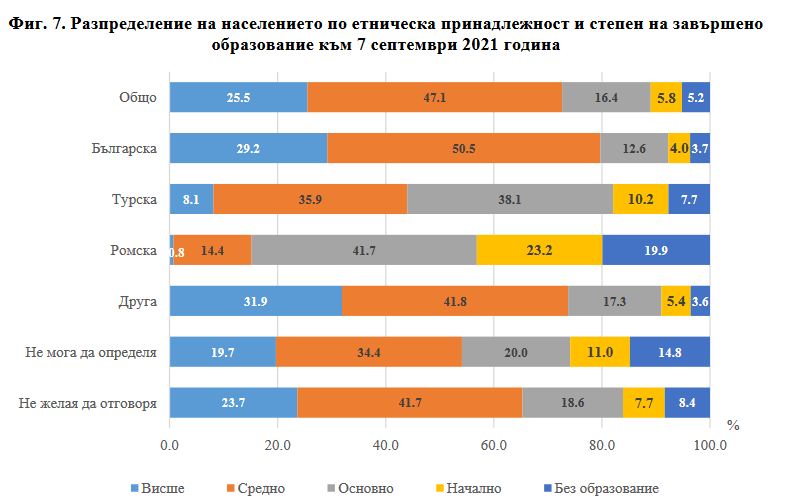

2. Acording to this [site for qualifications](https://zbut-academy.bg/obuchenie/kurs-zavarchik/) the trainees must obay the *Regulation for Conditions and Procedure for acquisition and recognition of welding competence*, which states that they must have passed **6-th** grade (**secondary edication**) and be **16 years old** or successfully completed a literacy course under the Employment Promotion Act (EPA). This site also gives us information of a course price: **600 leva**.
    
        -> The 90 % confidence interval for number of potential trainees becomes: [0, 140000]

3. This is too broad, we need to see how much market demand there is. In the most popular [bulgarian site for job searching](https://www.jobs.bg/front_job_search.php?subm=1&keywords%5B%5D=%D0%B7%D0%B0%D0%B2%D0%B0%D1%80%D1%87%D0%B8%D0%BA) there are **100 job offerings!**. Looking at the [National Employment Agency](https://www.az.government.bg/bg/ejobs/prl_list/) we see similar job listnings, we conclude that the interval becomes:

        -> The 90 % confidence interval for number of potential trainees becomes: [0, 100]
        -> We will asume uniform distribution

4. Let's look at pricing this course. From point 1. the price was **600 leva**. [Another site](https://www.davitoz.org/kursove-za-zavarchik/) gives us a price of 956 leva (if you pay the lump sum) or **1056 leva** (that can be split in two payments of 528) for individual training course and for a group training the price is, of course lower. The minimum price we could find is 300 leva, which seems too low, however we will use it as a lower boundary.

        -> The 90 % confidence interval for number of potential course price: [300, 1056]
        -> We will asume normal distribution

5. Let's give some success rate intervals for students to finish our course. Acording to ["Massive open online course completion rates revisited: Assessment, length and attrition", by Katy Jordan](https://www.researchgate.net/publication/308391574_Massive_open_online_course_completion_rates_revisited_Assessment_length_and_attrition), we will use those results:

*"Completion rates (defined as the percentage of enrolled students who completed the course) vary from 0.7% to 52.1%, with a median value of 12.6%."*

This research is made on online courses. Our assumption is that in physical classes the completion rates should be at least double, you are more concentrated, motivated, social connections and so on.  

        -> We expect 25 people out of 100 to complete our qualification program
        -> We will asume beta distribution

## Costs

1. We need to obtay [The licensing requirements for a professional training center have been adopted by the Management Board of the National Agency for Professional Education and Training (NAPOO) with Protocol No. 09 dated July 16, 2008, amended and supplemented by Protocol No. 02 dated May 19, 2021](https://www.navet.government.bg/bg/media/iziskvania-l-cpo-002.pdf), thus we need:
 - Material and technical base
 - Human resources - teaching staff and administration capacity
 - Access and availability of information for all parties involved
 - etc. 

2. In order to asses some cost we will use the Profit and Loss Statement(P&L) from one of the qualification firms we mentioned earlier, called ["Izoblock" LLC](https://zbut-academy.bg/obuchenie/kurs-zavarchik/), which is publicly available in the bulgarian [Commercial Register](https://portal.registryagency.bg/CR/Reports/ActiveConditionTabResult?uic=123745189). Their total equity and liabilities are around **100 000 leva**, however they are a much bigger firm that offers many different courses, so our lower boundry would be half that

        -> The 90 % confidence interval for total equity and liability: [50000, 100000]
        -> We will asume normal distribution

## Monte Carlo simulation - Year 1

### Summary for year 1:
    - On average around 40 000 leva external financing will be needed to break even.
    - There is a chance that in one out of ten scenarios to be break even.
    - On average we created about 13 high in demand and well payed workers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
np.random.seed(13)
num_scenarios = 10000
mean_total_costs = (50000 + 100000) / 2
std_total_costs = (100000 - 50000) / 3.29
mean_course_price = (300 + 1056) / 2
std_course_price = (1056 - 300) / 3.29

In [85]:
data = pd.DataFrame({'scenario': np.arange(1, num_scenarios + 1),
                     'trainees': np.random.uniform(0, 100, size=num_scenarios),
                     'course_price': np.random.normal(loc = mean_course_price, scale = std_course_price, 
                                                      size=num_scenarios),
                     'course_completion': np.random.beta(25, 75, size=num_scenarios),
                        'totalCosts': np.random.normal(loc = mean_total_costs, scale = std_total_costs, 
                                                       size=num_scenarios)
                    }
                   )

In [86]:
# Creating a revenue column by multipling course price and trainees
data['total_revenue'] = data['trainees'] * data['course_price']
# Creating a column that calculates Net income by subtracting revenue and cost
data['NetIncome'] = data['total_revenue'] - data['totalCosts']
# Creating a column that shows how much new workforce we have created
data['Workforce'] = data['trainees'] * data['course_completion']
# Creating a column that counts if net income is above 0, break even point
data['Yes/No'] = np.where(data['NetIncome'] >= 0, 'Yes', 'No')

In [87]:
print(data)

      scenario   trainees  course_price  course_completion    totalCosts  \
0            1  77.770241    437.414318           0.267165  78435.610746   
1            2  23.754122    360.732690           0.186631  94306.536434   
2            3  82.427853    611.140278           0.262472  65015.954065   
3            4  96.574920    585.486643           0.352924  82660.472172   
4            5  97.260111    526.396135           0.228971  49079.744782   
...        ...        ...           ...                ...           ...   
9995      9996  79.667220    896.742256           0.285769  91090.290033   
9996      9997  57.350330    767.521677           0.168136  76781.511591   
9997      9998  13.252624    460.774572           0.259008  56537.472087   
9998      9999  79.817773    735.901942           0.194959  51242.317085   
9999     10000  29.906977    801.776460           0.214474  60782.875966   

      total_revenue     NetIncome  Workforce Yes/No  
0      34017.816978 -44417.793768

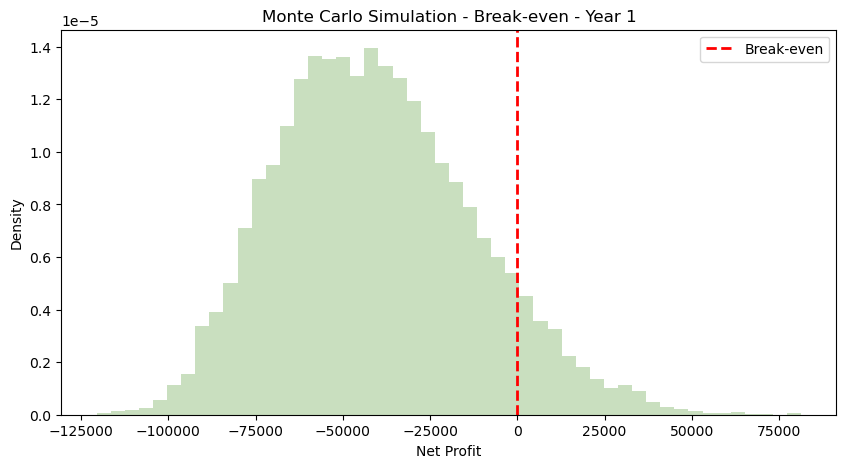

In [88]:
plt.figure(figsize=(10, 5))
plt.hist(data['NetIncome'], bins=50, density=True, color='#B2D2A4', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even')
plt.title('Monte Carlo Simulation - Break-even - Year 1')
plt.xlabel('Net Profit')
plt.ylabel('Density')
plt.legend()
plt.show()

In [89]:
result_table = pd.crosstab(index=data['Yes/No'], columns='count')
print(result_table)

col_0   count
Yes/No       
No       9109
Yes       891


In [90]:
column_summary = data.describe()
print(column_summary)

          scenario      trainees  course_price  course_completion  \
count  10000.00000  10000.000000  10000.000000       10000.000000   
mean    5000.50000     50.417405    681.117325           0.249605   
std     2886.89568     28.882900    228.755501           0.043482   
min        1.00000      0.000169   -195.528108           0.107179   
25%     2500.75000     24.972291    526.165218           0.219438   
50%     5000.50000     50.849518    680.263954           0.248029   
75%     7500.25000     75.404006    834.016666           0.278713   
max    10000.00000     99.998016   1698.800160           0.427875   

          totalCosts  total_revenue      NetIncome     Workforce  
count   10000.000000   10000.000000   10000.000000  10000.000000  
mean    74854.974994   34374.583132  -40480.391862     12.594864  
std     15218.777008   23825.751111   28365.431430      7.655958  
min      9783.220333   -4850.915186 -120525.608921      0.000034  
25%     64449.879494   14879.011510  -61075

## Monte Carlo simulation - Year 2

1. After year one and successful marketing campain we expect our student count to increase. Our reasons are as follows:
    - There is a severe shortage of manual workers
    - They are crucial for the whole economy
    - They are very well paid!
    - They are AI free, for now!

2. Based on point 1 information, we will construct a new interval for the students. To make a good enough prediction we will use the standard deviation of the people, who completed our course, which is 11. Then we will add it to the previous invervals' lower and upper boundary. It will look as follows:

        -> The 90 % confidence interval for number of potential trainees becomes: [13, 113]

3. To look more professional we should also update our course price, as we made a big interval at the beginning. How should we update it? We will set our lower boundary to 500 and for bigger groups we will make a discount.

        -> The 90 % confidence interval for number of potential course price: [500, 1056] 

4. After the first year, we took some measures to increase our course completion. From the first year we saw that on average 25 % of enrolled students completed our course, evey year we will try to increase it by 10%:

        -> Out of 100 we expect atleast 35 to complete the program

### Summary for year 2:
    - This year around 26 000 leva are needed to be provided externally, which is an improvement of 14 000 leva!
    - The chances to break even have doubled! Now in every 2 out of 10 scenarios we will break even!
    - We created 20 more well payed workers!

In [94]:
mean_total_costs = (50000 + 100000) / 2
std_total_costs = (100000 - 50000) / 3.29
mean_course_price = (500 + 1056) / 2
std_course_price = (1056 - 500) / 3.29

In [95]:
year_02 = pd.DataFrame({'scenario': np.arange(1, num_scenarios + 1),
                     'trainees': np.random.uniform(13, 113, size=num_scenarios),
                     'course_price': np.random.normal(loc = mean_course_price, scale = std_course_price, 
                                                      size=num_scenarios),
                     'course_completion': np.random.beta(35, 75, size=num_scenarios),
                        'totalCosts': np.random.normal(mean_total_costs, std_total_costs, size=num_scenarios)
                       }
                      )

In [96]:
# Creating a revenue column by multipling course price and trainees
year_02['total_revenue'] = year_02['trainees'] * year_02['course_price']
# Creating a column that calculates Net income by subtracting revenue and cost
year_02['NetIncome'] = year_02['total_revenue'] - year_02['totalCosts']
# Creating a column that shows how much new workforce we have created
year_02['Workforce'] = year_02['trainees'] * year_02['course_completion']
# Creating a column that counts if net income is above 0, break even point
year_02['Yes/No'] = np.where(year_02['NetIncome'] >= 0, 'Yes', 'No')

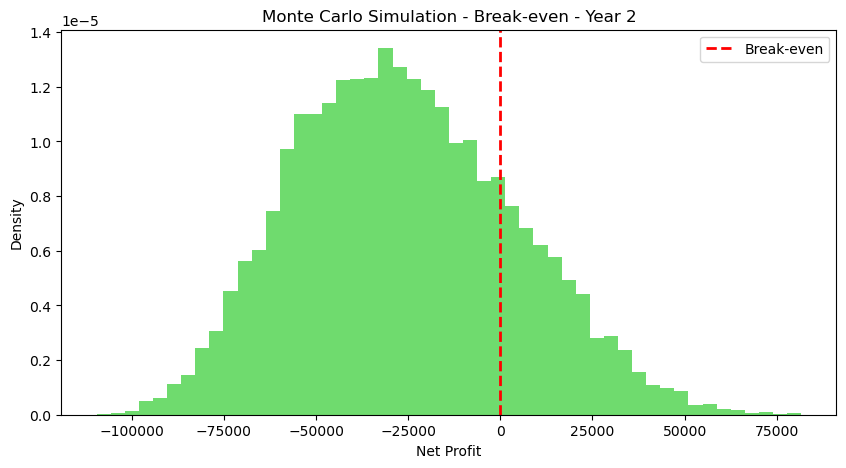

In [97]:
plt.figure(figsize=(10, 5))
plt.hist(year_02['NetIncome'], bins=50, density=True, color='#32CD30', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even')
plt.title('Monte Carlo Simulation - Break-even - Year 2')
plt.xlabel('Net Profit')
plt.ylabel('Density')
plt.legend()
plt.show()

In [98]:
result_table = pd.crosstab(index=year_02['Yes/No'], columns='count')
print(result_table)

col_0   count
Yes/No       
No       7992
Yes      2008


In [99]:
column_summary = year_02.describe()
print(column_summary)

          scenario      trainees  course_price  course_completion  \
count  10000.00000  10000.000000  10000.000000       10000.000000   
mean    5000.50000     62.917672    776.458921           0.317966   
std     2886.89568     28.803923    169.554270           0.043623   
min        1.00000     13.004282     95.246506           0.152141   
25%     2500.75000     38.127416    662.046993           0.287762   
50%     5000.50000     63.031785    778.099547           0.316810   
75%     7500.25000     87.784254    891.046364           0.347245   
max    10000.00000    112.984837   1372.168677           0.492573   

          totalCosts  total_revenue      NetIncome     Workforce  
count   10000.000000   10000.000000   10000.000000  10000.000000  
mean    74885.555651   48829.330833  -26056.224818     20.029494  
std     15281.070254   25197.355336   29772.272013      9.698997  
min     19472.692696    5182.505924 -109552.370535      2.787899  
25%     64612.031253   27936.192423  -48013

## Monte Carlo simulation - Year 3

1. So far we have fully train 36 students over the two years. We begin to develop a good name, so on and so on. We will once again update our indicators, following the year 2 schema:

        -> The 90 % confidence interval for number of potential trainees becomes: [36, 136]
        -> In year 2 we had a 31 % program completion, we will try to increase in to 40%

2. Prices should remain stable, but our costs should increase. Reasons for cost increases are a lot, but mainly due to our increase in scope and size:

        -> The 90 % confidence interval for total equity and liability: [60000, 110000]

### Summary in year 3


    - Our losses are expected to be around 15 000 leva, big improvement compared to year 1!
    - Now in every 3 out of 10 scenarios we will break even!
    - We created 30 highly demanded workers just this year!

In [100]:
mean_total_costs = (60000 + 110000) / 2
std_total_costs = (110000 - 60000) / 3.29
mean_course_price = (500 + 1056) / 2
std_course_price = (1056 - 500) / 3.29

In [101]:
year_03 = pd.DataFrame({'scenario': np.arange(1, num_scenarios + 1),
                     'trainees': np.random.uniform(36, 136, size=num_scenarios),
                     'course_price': np.random.normal(loc = mean_course_price, scale = std_course_price, 
                                                      size=num_scenarios),
                     'course_completion': np.random.beta(40, 60, size=num_scenarios),
                        'totalCosts': np.random.normal(mean_total_costs, std_total_costs, size=num_scenarios)
                       }
                      )

In [102]:
# Creating a revenue column by multipling course price and trainees
year_03['total_revenue'] = year_03['trainees'] * year_03['course_price']
# Creating a column that calculates Net income by subtracting revenue and cost
year_03['NetIncome'] = year_03['total_revenue'] - year_03['totalCosts']
# Creating a column that shows how much new workforce we have created
year_03['Workforce'] = year_03['trainees'] * year_03['course_completion']
# Creating a column that counts if net income is above 0, break even point
year_03['Yes/No'] = np.where(year_03['NetIncome'] >= 0, 'Yes', 'No')

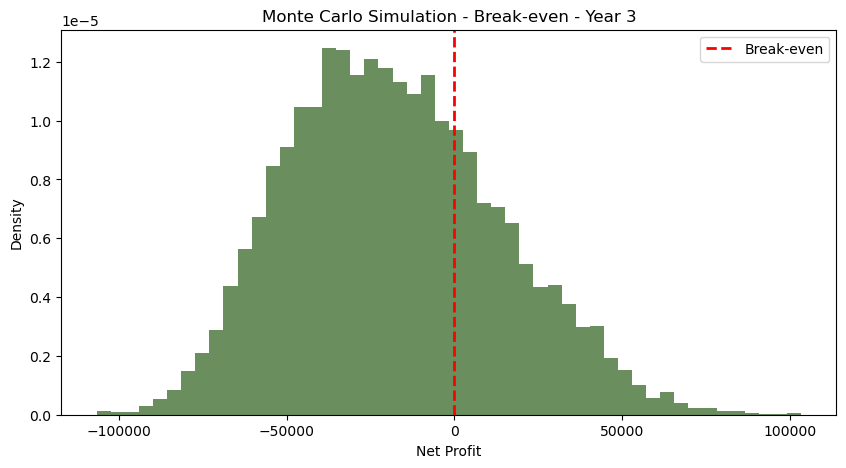

In [103]:
plt.figure(figsize=(10, 5))
plt.hist(year_03['NetIncome'], bins=50, density=True, color='#2C5E1A', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even')
plt.title('Monte Carlo Simulation - Break-even - Year 3')
plt.xlabel('Net Profit')
plt.ylabel('Density')
plt.legend()
plt.show()

In [104]:
column_summary = year_03.describe()
print(column_summary)

          scenario      trainees  course_price  course_completion  \
count  10000.00000  10000.000000  10000.000000       10000.000000   
mean    5000.50000     85.925939    776.450396           0.399128   
std     2886.89568     28.789666    168.869188           0.048746   
min        1.00000     36.001969     53.768515           0.245179   
25%     2500.75000     61.062280    661.726978           0.365990   
50%     5000.50000     85.765588    776.105749           0.398228   
75%     7500.25000    110.822024    891.105500           0.431432   
max    10000.00000    135.983238   1400.255593           0.637758   

          totalCosts  total_revenue      NetIncome     Workforce  
count   10000.000000   10000.000000   10000.000000  10000.000000  
mean    84795.530561   66835.683436  -17959.847125     34.312606  
std     15337.940538   27410.182310   31499.598759     12.341996  
min     24511.902731    3493.820805 -106699.233087      9.806025  
25%     74486.201760   44839.591487  -41267

In [105]:
result_table = pd.crosstab(index=year_03['Yes/No'], columns='count')
print(result_table)

col_0   count
Yes/No       
No       7217
Yes      2783
